<a href="https://colab.research.google.com/github/darshbaxi/Tensorflow-Practice/blob/main/firstproject_on_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
from tensorflow.keras import datasets,layers,models
import cv2

## LOADING **DATA**

In [ ]:
(x_train,y_train),(x_test,y_test)=datasets.cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [ ]:


 x_train.shape

(50000, 32, 32, 3)

In [ ]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

## Reshaping Y_TRAIN

In [ ]:
 y_train.reshape(-1)

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [ ]:
classes=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

## EXPLORING DATA

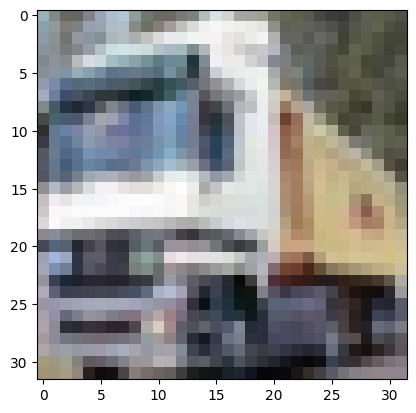

In [ ]:

plt.imshow(x_train[1])

## Normalization

In [ ]:


x_train=x_train/255.0


## CNN MODEL

In [ ]:
cnn = models.Sequential([
    layers.Conv2D(filters=64, kernel_size=(4, 4),activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(4, 4), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=32, kernel_size=(4, 4), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])


In [ ]:

cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
cnn.fit(x_train, y_train, epochs=50)


Epoch 1/50
1563/1563 [==============================] - 17s 5ms/step - loss: 1.6355 - accuracy: 0.3971
Epoch 2/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.3089 - accuracy: 0.5259
Epoch 3/50
1563/1563 [==============================] - 7s 5ms/step - loss: 1.1767 - accuracy: 0.5767
Epoch 4/50
1563/1563 [==============================] - 7s 4ms/step - loss: 1.0853 - accuracy: 0.6157
Epoch 5/50
1563/1563 [==============================] - 7s 5ms/step - loss: 1.0213 - accuracy: 0.6394
Epoch 6/50
1563/1563 [==============================] - 7s 5ms/step - loss: 0.9735 - accuracy: 0.6571
Epoch 7/50
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9385 - accuracy: 0.6720
Epoch 8/50
1563/1563 [==============================] - 7s 5ms/step - loss: 0.9039 - accuracy: 0.6806
Epoch 9/50
1563/1563 [==============================] - 7s 5ms/step - loss: 0.8768 - accuracy: 0.6949
Epoch 10/50
1563/1563 [==============================] - 7s 5ms/step - loss: 0.84

## RESHAPING TEST DATA

In [ ]:
y_test=y_test.reshape(-1)

In [ ]:
x_test=x_test/255.0

## predicting output

In [ ]:
predict=cnn.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [ ]:
y_classes = [np.argmax(element) for element in predict]

In [ ]:
cnn.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.2833 - accuracy: 0.6754


[1.2832614183425903, 0.6754000186920166]